In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


from src.path_loss import PathLossInHIndoorOffice, PathLossInHShoppingMalls
from src.network_sim import NetworkSimulator
from src.algorithm import stochastic_wmmse
from src.experiment import ExperimentInterferenceModelComparison

%reload_ext autoreload
%autoreload 2
%aimport src

In [2]:
frequency_Hz = 60 * 1e09
distance_m = 200
sample_size=10

pd.DataFrame({
    'PathLossInHIndoorOffice':[PathLossInHIndoorOffice().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
    'PathLossInHShoppingMalls': [PathLossInHShoppingMalls().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
})

,PathLossInHIndoorOffice,PathLossInHShoppingMalls
0,-151.905175,-145.866644
1,-161.451449,-157.440004
2,-148.637627,-135.432346
3,-158.344369,-151.265596
4,-157.704633,-142.276249
5,-155.948464,-152.436834
6,-169.541871,-138.928853
7,-159.403757,-139.430654
8,-150.575373,-147.529770
9,-158.646880,-143.117291


In [3]:
simulator = NetworkSimulator(Tx_radius=200, Rx_radius=25, num_Tx_netA=5, num_Rx_per_Tx_netA=10, num_Tx_netB=5, num_Rx_per_Tx_netB=10)

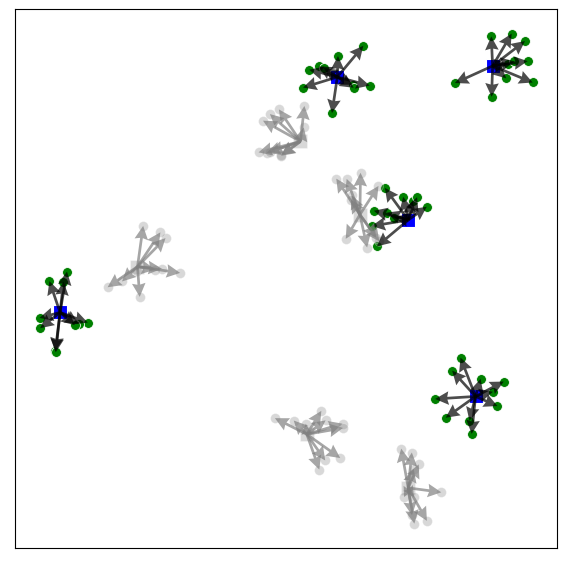

In [4]:
simulator.plot_network()

In [5]:
pd.DataFrame(simulator.gain_mat_dBm)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-90.753284,-107.313606,-100.621588,-91.806264,-89.809794,-102.886653,-96.585257,-81.192073,-96.639251,-99.649207,...,-137.999717,-139.962075,-145.056642,-124.281119,-144.842411,-129.542936,-137.102578,-129.998006,-141.144641,-131.457682
1,-119.531209,-109.495060,-111.214278,-118.516953,-114.033251,-116.829123,-106.650973,-123.962856,-116.693512,-109.023566,...,-151.069417,-159.962179,-163.989346,-157.835520,-151.374216,-149.670054,-154.153812,-153.265715,-148.420711,-155.461403
2,-99.832748,-110.558658,-124.216443,-109.830669,-127.820818,-112.361904,-108.631692,-101.033895,-128.818815,-120.318665,...,-161.278685,-160.495867,-145.361978,-147.215221,-163.050257,-150.402385,-159.568358,-163.650168,-166.784734,-143.502162
3,-136.895437,-142.123869,-149.316868,-140.268537,-153.243140,-143.059267,-153.626934,-151.167949,-142.679964,-141.633889,...,-141.905247,-148.774665,-156.261133,-138.891085,-156.046487,-159.660726,-150.690017,-155.476321,-149.665894,-140.932885
4,-123.230180,-114.483744,-123.493933,-119.528477,-121.588801,-124.738218,-128.662103,-111.787740,-114.591708,-122.061675,...,-120.908898,-109.858237,-115.321822,-101.675815,-97.176801,-108.261491,-109.456429,-108.495498,-97.206340,-119.443739
5,-130.110769,-138.140796,-134.297327,-117.973081,-141.227966,-132.094456,-126.777854,-131.665039,-126.460266,-125.462181,...,-152.283979,-141.154333,-158.283805,-140.771710,-149.075317,-128.612140,-146.872864,-144.877262,-144.311148,-133.428121
6,-98.540945,-104.728690,-103.403594,-85.036742,-93.987299,-107.099851,-94.842354,-98.093428,-90.520080,-91.748155,...,-149.608454,-129.416349,-152.607652,-118.832286,-130.859304,-139.721531,-131.904391,-134.744910,-138.936466,-130.658165
7,-107.073146,-119.888041,-110.688082,-108.094871,-113.355828,-117.519571,-127.524984,-100.715796,-108.222211,-112.664228,...,-156.783909,-153.112357,-144.417934,-145.513087,-148.582610,-138.442919,-148.108903,-145.647973,-150.588783,-142.687260
8,-126.101132,-136.176348,-119.284701,-114.395904,-131.985451,-128.776952,-125.983546,-135.649652,-121.082808,-125.547304,...,-118.715931,-120.032781,-128.317563,-112.571942,-103.649737,-112.902105,-101.446563,-111.792263,-113.044596,-103.616302
9,-130.806328,-133.132938,-147.027006,-128.360133,-159.432180,-134.611756,-135.699942,-138.448506,-130.966812,-137.521169,...,-91.340026,-100.251458,-104.167833,-107.389251,-100.892479,-84.457444,-77.988974,-83.822220,-90.183990,-90.739326


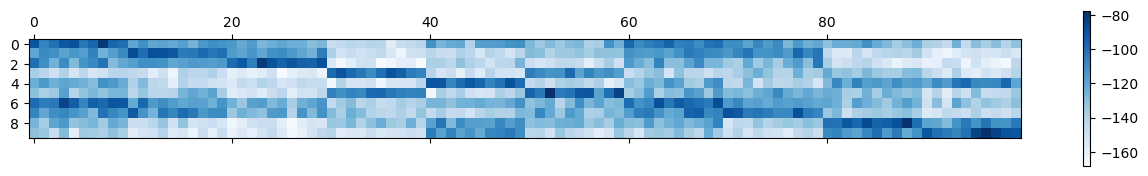

In [6]:
simulator.plot_gain_mat()

## Model Comparisons

In [7]:
simulator.weighted_sum_rate_Gnats([1e-10 for i in range(simulator.num_Rx)], Rx_weights=np.ones(simulator.num_Rx), part='A')

0.0001102418152168613

In [8]:
model_comparison = ExperimentInterferenceModelComparison(simulator=simulator)
model_comparison.data_generation(num_samples=1, max_power=200, netB_power_mode='dependent')
model_comparison.modeling()

In [9]:
model_comparison.run(num_rounds=100, netA_power_mode='random', netB_power_mode='zero')

,interference,sc_bias,lr_bias
0,6.992488e-07,-0.036421,-0.863483


In [10]:
model_comparison.run(num_rounds=100, netA_power_mode='random', netB_power_mode='dependent')

,interference,sc_bias,lr_bias
0,8.298889e-07,-0.112902,-0.884973


In [11]:
model_comparison.run(num_rounds=100, netA_power_mode='random', netB_power_mode='dependent')

,interference,sc_bias,lr_bias
0,8.537147e-07,-0.106028,-0.888184


In [12]:
model_comparison.run(num_rounds=100, netA_power_mode='random', netB_power_mode='uniform')

,interference,sc_bias,lr_bias
0,7.658718e-07,-0.074893,-0.875359


## Algorithm Comparisons

In [13]:
max_power = 200
netB_power_training_mode = 'dependent' # ['dependent', 'zero', 'random']
netB_power_testing_mode = 'dependent' # ['dependent', 'zero', 'random', 'uniform']

max_iterations = 500

model_comparison = ExperimentInterferenceModelComparison(simulator=simulator)
model_comparison.data_generation(num_samples=1000, max_power=max_power, netB_power_mode=netB_power_training_mode)
model_comparison.modeling(synthetic_constrained=True)
starting_powers_mW = [1e-5 for i in range(simulator.num_Rx)]
# Rx_weights = np.random.uniform(0.1, 1, simulator.num_Rx)
Rx_weights = np.ones(simulator.num_Rx)

In [14]:
rates_original_method = stochastic_wmmse(
    simulator=simulator,
    Rx_powers_mW=starting_powers_mW,
    Rx_max_powers_mW=max_power,
    Rx_weights=Rx_weights,
    interference_mode='original',
    interference_models=[],
    netB_power_mode = netB_power_testing_mode,
    power_corr_mat=model_comparison.power_corr_mat,
    max_iter=max_iterations,
);

In [15]:
rates_local_method = stochastic_wmmse(
    simulator=simulator,
    Rx_powers_mW=starting_powers_mW,
    Rx_max_powers_mW=max_power,
    Rx_weights=Rx_weights,
    interference_mode='local',
    interference_models=model_comparison.lr_models,
    netB_power_mode = netB_power_testing_mode,
    power_corr_mat=model_comparison.power_corr_mat,
    max_iter=max_iterations,
);

In [17]:
rates_sc_method = stochastic_wmmse(
    simulator=simulator,
    Rx_powers_mW=starting_powers_mW,
    Rx_max_powers_mW=max_power,
    Rx_weights=Rx_weights,
    interference_mode='sc_estimate',
    interference_models=model_comparison.sc_models,
    netB_power_mode = netB_power_testing_mode,
    power_corr_mat=model_comparison.power_corr_mat,
    max_iter=max_iterations,
);

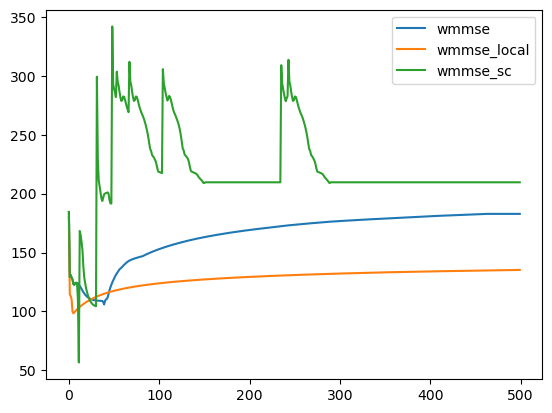

In [18]:
data = pd.DataFrame({
    'wmmse': rates_original_method,
    'wmmse_local': rates_local_method,
    'wmmse_sc': rates_sc_method,
})
data.plot();